In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random
import warnings
warnings.simplefilter("ignore")


In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.859146,3.480398,-2.882182,-0.347813,0.770659,1
1,1.555192,1.613568,-1.583097,1.101079,0.344955,1
2,1.116929,0.641166,-1.338132,1.538477,-0.728124,1
3,1.154583,2.839022,-2.138209,-0.039862,-0.250081,1
4,-0.172723,0.417434,-0.150303,3.234401,1.479277,0


In [ ]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

## **Pasting**

we know that in pasting randomly rows are selected 

In [ ]:
df

,col1,col2,col3,col4,col5,target
0,2.859146,3.480398,-2.882182,-0.347813,0.770659,1
1,1.555192,1.613568,-1.583097,1.101079,0.344955,1
2,1.116929,0.641166,-1.338132,1.538477,-0.728124,1
3,1.154583,2.839022,-2.138209,-0.039862,-0.250081,1
4,-0.172723,0.417434,-0.150303,3.234401,1.479277,0
...,...,...,...,...,...,...
95,0.568757,-0.553376,-0.477568,2.007200,-0.730688,1
96,-1.989546,2.121591,-0.276327,1.266120,-0.039170,0
97,0.773298,-0.148027,-1.020588,1.768861,-0.568776,1
98,-2.335057,1.400058,-2.514671,-0.954643,3.244775,0


In [ ]:
df1 = sample_rows(df,0.2)

In [ ]:
df2 = sample_rows(df,0.2)

In [ ]:
df3 = sample_rows(df,0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.368\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.5, 'x[3] <= 1.948\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

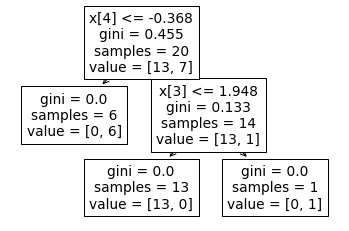

In [ ]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.875, 'x[0] <= -0.981\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.625, 'x[3] <= 2.343\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= -2.44\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

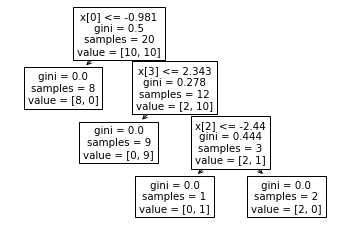

In [ ]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.055\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'x[0] <= 0.531\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

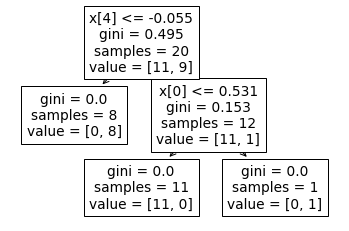

In [ ]:
plot_tree(clf3)

In [ ]:
#let take 99th row of df and predict the output ..we know its label is 0
clf1.predict(np.array([-0.023877,-0.233023,-0.870364,2.347886,0.720394]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.023877,-0.233023,-0.870364,2.347886,0.720394]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-0.023877,-0.233023,-0.870364,2.347886,0.720394]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#as we can see majority classifier say 0 so taking mode or aggregating this will give me 0 as answer

## **Random Subspace**

In random subspace we give all the rows but use sampling on columns

In [ ]:
df1 = sample_features(df,0.8)

In [ ]:
df2 = sample_features(df,0.8)

In [ ]:
df3 = sample_features(df,0.8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4, 0.9285714285714286, 'x[2] <= -0.478\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.7857142857142857, 'x[0] <= -1.55\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.06666666666666667, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2, 0.6428571428571429, 'x[0] <= 3.136\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.13333333333333333, 0.5, 'x[1] <= 3.153\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[3] <= -1.851\ngini = 0.358\nsamples = 60\nvalue = [46, 14]'),
 Text(0.4666666666666667, 0.6428571428571429, 'x[0] <= -0.623\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 

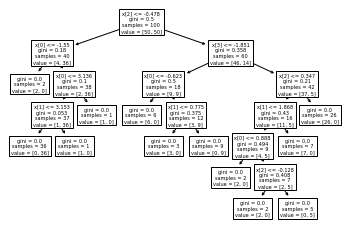

In [ ]:
plot_tree(clf1)

[Text(0.40625, 0.9166666666666666, 'x[1] <= -0.478\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.1875, 0.75, 'x[3] <= 3.153\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.125, 0.5833333333333334, 'x[0] <= -1.55\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= 3.136\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.75, 'x[2] <= 1.265\ngini = 0.358\nsamples = 60\nvalue = [46, 14]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= -0.069\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.4375, 0.4166666666666667, 'x[3] <= 2.615\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.

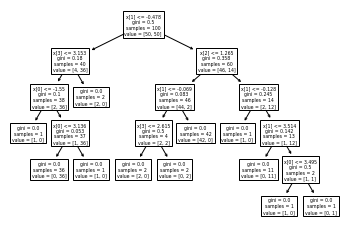

In [ ]:
plot_tree(clf2)

[Text(0.4230769230769231, 0.9166666666666666, 'x[1] <= -0.478\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.15384615384615385, 0.75, 'x[0] <= -2.457\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[3] <= 3.153\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[2] <= 0.49\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.23076923076923078, 0.25, 'x[0] <= 0.17\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6923076923076923, 0.75, 'x[0] <= 1

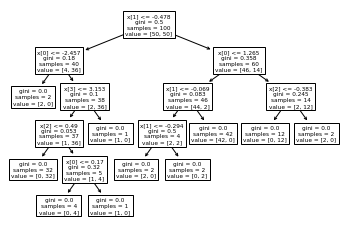

In [ ]:
plot_tree(clf3)

In [ ]:
df3

,col1,col5,col3,col2,target
0,2.859146,0.770659,-2.882182,3.480398,1
1,1.555192,0.344955,-1.583097,1.613568,1
2,1.116929,-0.728124,-1.338132,0.641166,1
3,1.154583,-0.250081,-2.138209,2.839022,1
4,-0.172723,1.479277,-0.150303,0.417434,0
...,...,...,...,...,...
95,0.568757,-0.730688,-0.477568,-0.553376,1
96,-1.989546,-0.039170,-0.276327,2.121591,0
97,0.773298,-0.568776,-1.020588,-0.148027,1
98,-2.335057,3.244775,-2.514671,1.400058,0


In [ ]:
clf1.predict(np.array([-0.023877,0.720394,-0.870364,-0.233023]).reshape(1,4))  #output we know is zero

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.023877,0.720394,-0.870364,-0.233023]).reshape(1,4))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-0.023877,0.720394,-0.870364,-0.233023]).reshape(1,4))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#here also majority wins and answer is zero

## **Random Patches**

In Random Patches we do both column and row sampling

In [ ]:
df1 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df2 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df3 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [ ]:
df3

,col3,col2,target
2,-0.943985,-1.727474,1
53,2.879522,-1.179645,0
17,-0.601854,0.240279,1
12,-1.209724,0.077615,1
8,-0.147061,-0.352877,0
6,-1.029536,-0.770751,1
94,-0.930578,-1.265605,1
4,0.022074,-0.911493,0
38,2.538559,-1.042250,0
40,0.595038,-0.162759,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import plot_tree

[Text(167.4, 199.32, 'X[1] <= 0.417\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(55.800000000000004, 163.07999999999998, 'X[0] <= -1.244\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(27.900000000000002, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(83.7, 126.83999999999999, 'X[1] <= 0.149\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(55.800000000000004, 90.6, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(111.60000000000001, 90.6, 'X[0] <= 1.129\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(83.7, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 163.07999999999998, 'X[1] <= 2.099\ngini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(251.10000000000002, 126.83999999999999, 'X[1] <= 1.129\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(223.20000000000002, 90.6, 'X[1] <= 0.901\ngini = 0.397\nsamples = 11\nvalue = [8, 3]')

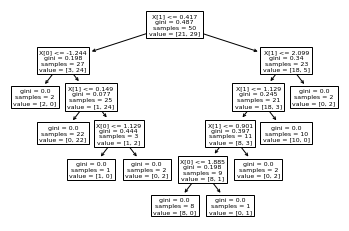

In [ ]:
plot_tree(clf1)

[Text(209.25, 201.90857142857143, 'X[1] <= -0.391\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(167.4, 170.84571428571428, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(251.10000000000002, 170.84571428571428, 'X[0] <= 3.267\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(209.25, 139.78285714285715, 'X[1] <= 0.588\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(167.4, 108.72, 'X[1] <= 0.357\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(125.55000000000001, 77.65714285714284, 'X[1] <= -0.15\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(83.7, 46.59428571428572, 'X[1] <= -0.162\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(41.85, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 46.59428571428572, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(209.25, 77.65714285714284, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000

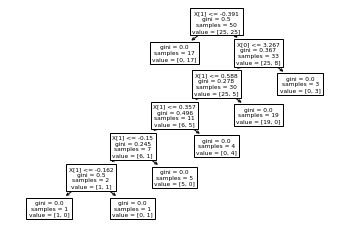

In [ ]:
plot_tree(clf2)

[Text(251.10000000000002, 199.32, 'X[0] <= -0.208\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(209.25, 163.07999999999998, 'X[1] <= -1.513\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(167.4, 126.83999999999999, 'X[1] <= -1.558\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(125.55000000000001, 90.6, 'X[1] <= -1.972\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(83.7, 54.359999999999985, 'X[1] <= -2.141\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(41.85, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(209.25, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 126.83999999999999, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(292.95, 163.07999999999998, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]')]

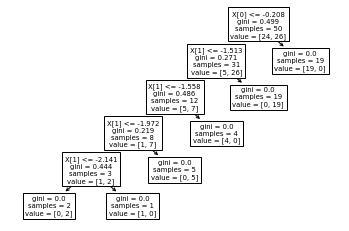

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [ ]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([0])

In [ ]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
